## Unimodality
In this notebook we explore the unimodality test. It is slightly less straightforward than the other tests; this notebook should therefore serve as supplementary explanation to the functions docstring.


In Fattal's paper, there are 7 tests that a color-line must pass to be considered valid. One of the these is the unimodality test. The unimodality test checks whether the color-line is not an average of two two seperate color-lines. In other words, it checks whether the color-line's image patch does not contain two or more surfaces that give rise to seperate color-lines that appear to support a single color-line.
### How does the test work? 
If different surfaces gave rise to a color-line, we would expect to see clusters of RGB points in different regions of the line. If we consider the line to be an axis along which we can plot the projected RGB point density, multiple clusters would mean a multimodal distribution (a distribution with multiple peaks).
    
The test works by asserting that there is a single peak. The distribution of the supporting points projected onto the colorline is normalized to some scale, in this case $[0, \pi]$, and the cosine is taken of each point.
Because of the shape of the cosine, the sum over all points vanishes over uniformly distributed pixels and becomes positive when the pixels are concentrated near the endpoints.

### Formula 

$$\frac{1}{|\Omega|}\sum_{x \in \Omega}cos(\alpha \langle I(x) - V, D\rangle + b)$$   
$a, b$ = Values for scaling the distribution to range $[0, \pi]$  
$|\Omega|$ = The number of pixels in the image patch 
$V$ = T


# Shape of cosine $[0, \pi]$

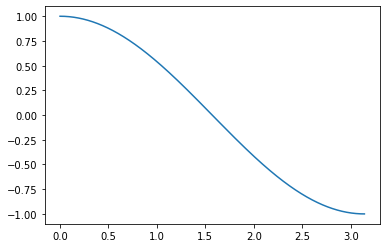

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

nr_samples = 10000
x = np.linspace(0, np.pi, nr_samples)
y = np.cos(x)

plt.plot(x, y)

# Unimodality Score Formula

In [2]:
def unimodality_score(samples):
    nr_samples = len(samples)
    score = np.sum(np.cos(samples)) / nr_samples
    score = abs(score)
    return score

# Distribution scores

In [9]:
def display_score(dist, name):
    threshold = 0.07
    score = unimodality_score(dist)
    print('{} score: {:.5f}'.format(name, score))
    print('passed threshold: {}\n'.format(score < threshold))
    
uniform = np.random.uniform(low=0, high=np.pi, size=nr_samples)
gaussian = np.random.normal(loc=np.pi/2, scale=1, size=nr_samples)
chi2 = np.random.chisquare(df=np.pi/2, size=nr_samples)
bimodal = np.concatenate((np.random.normal(np.pi/8,0.1,nr_samples), np.random.normal(np.pi/8*5,0.1,nr_samples)))

dists = [(uniform,'Uniform'), (gaussian,'Gaussian'), 
         (chi2,'Chi-squared'), (bimodal,'Bimodal')]

for dist, name in dists:
    display_score(dist, name)

Uniform score: 0.00524
passed threshold: True

Gaussian score: 0.00297
passed threshold: True

Chi-squared score: 0.34749
passed threshold: False

Bimodal score: 0.26969
passed threshold: False



# Flaws: Biomodal dist mirrored on $\pi/2$
In the case of a bimodal distribution mirron on the point $\pi/2$, the test will still pass.

Score: 0.00026
Passed threshold: True



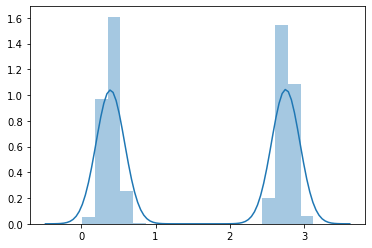

In [15]:
bimodal = np.concatenate((np.random.normal(np.pi/8,0.1,nr_samples), np.random.normal(np.pi/8*7,0.1,nr_samples)))

sns.distplot(bimodal)

threshold = 0.07
score = unimodality_score(bimodal)
print('Score: {:.5f}'.format(score))
print('Passed threshold: {}\n'.format(score < threshold))